<a href="https://colab.research.google.com/github/aqibfirdous/COB-DataScience/blob/main/DiseasePrediction20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DISEASE PREDICTION#

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [4]:
print(os.listdir())

['.config', 'best_ann_model.pkl', 'xgboost_model.pkl', 'decision_tree_model.pkl', 'U.S._Chronic_Disease_Indicators.csv', 'U.S._Chronic_Disease_Indicators__CDI_.csv', '.ipynb_checkpoints', 'best_rf_model.pkl', 'best_svm_model.pkl', 'knn_model.pkl', 'sample_data']


In [5]:
df =  pd.read_csv("/content/U.S._Chronic_Disease_Indicators__CDI_.csv",low_memory=False)

In [6]:
import pandas as pd

# Read the CSV file with low_memory=False to suppress the warning
df = pd.read_csv("/content/U.S._Chronic_Disease_Indicators__CDI_.csv", low_memory=False)
df


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,2020,2020,WY,Wyoming,BRFSS,Diabetes,Dilated eye examination among adults aged >= 1...,NaN,%,Age-adjusted Prevalence,...,56,DIA,DIA7_0,AGEADJPREV,RACE,WHT,NaN,NaN,NaN,NaN
1185672,2020,2020,WY,Wyoming,BRFSS,Older Adults,Proportion of older adults aged >= 65 years wh...,NaN,%,Crude Prevalence,...,56,OLD,OLD3_1,CRDPREV,RACE,WHT,NaN,NaN,NaN,NaN
1185673,2017,2017,IA,Iowa,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,NaN,%,Age-adjusted Prevalence,...,19,ART,ART2_1,AGEADJPREV,RACE,HIS,NaN,NaN,NaN,NaN
1185674,2020,2020,WY,Wyoming,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,NaN,%,Crude Prevalence,...,56,DIA,DIA2_2,CRDPREV,RACE,HIS,NaN,NaN,NaN,NaN


In [7]:
total_rows_in_dataset = df.shape[0]


In [8]:
total_rows_in_dataset

1185676

<Axes: >

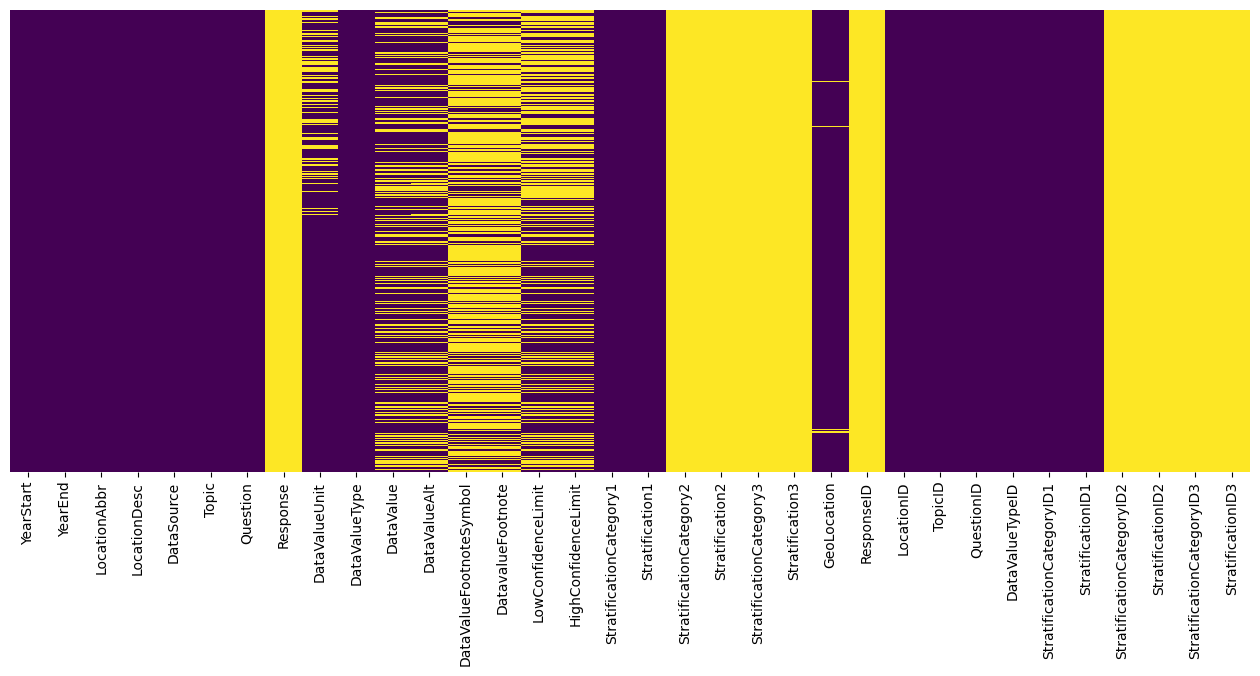

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [10]:
columns_to_fill = ['StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3',
                   'StratificationID3', 'Response','ResponseID','StratificationCategory2', 'Stratification2',
                   'StratificationCategory3', 'Stratification3','DataValueUnit', 'DataValue', 'DataValueFootnoteSymbol',
                   'DatavalueFootnote', 'GeoLocation','LowConfidenceLimit','HighConfidenceLimit','DataValueAlt']
fill_value = 9999

df.fillna({col: fill_value for col in columns_to_fill}, inplace=True)


<Axes: >

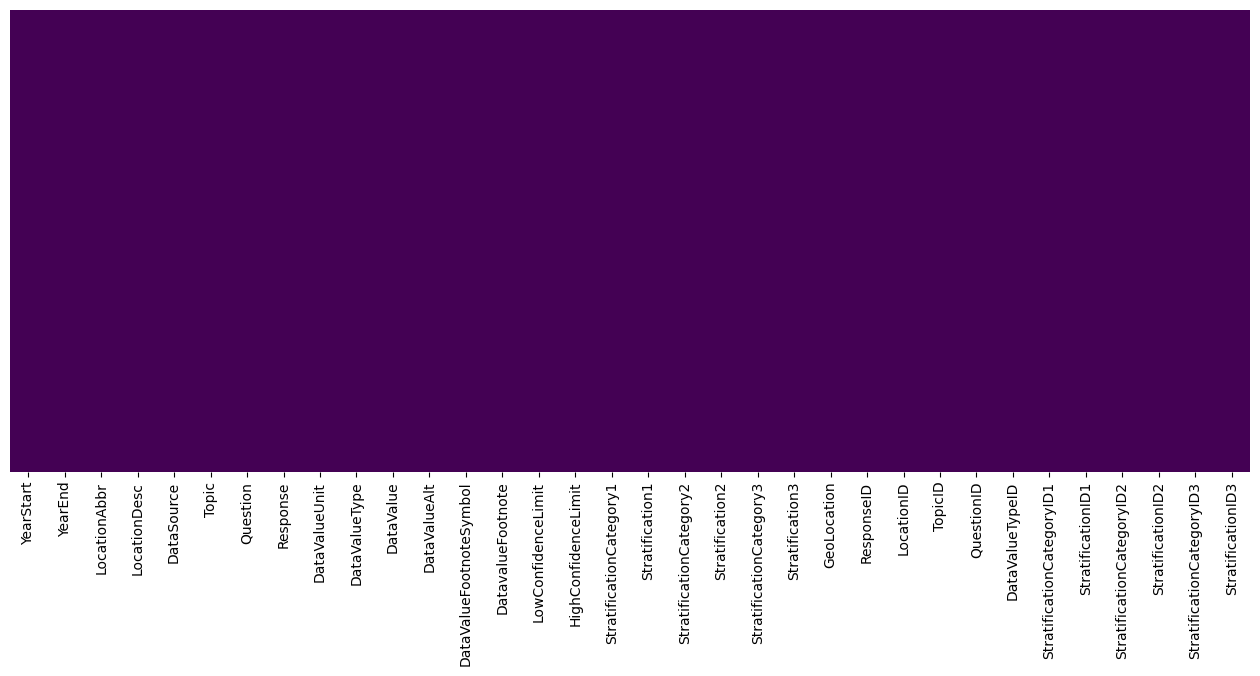

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

         YearStart  YearEnd  LocationAbbr  LocationDesc  DataSource  Topic  \
0                8        8             2             3          23      2   
1               12       12             5             5          23      2   
2               12       12             7             8          23      2   
3               11       11            10            10          23      2   
4                4        4            23            23          23      2   
...            ...      ...           ...           ...         ...    ...   
1185671         14       14            54            54           6      7   
1185672         14       14            54            54           6     12   
1185673         11       11            13            16           6      1   
1185674         14       14            54            54           6      7   
1185675         13       13            41            41           6      1   

         Question  Response  DataValueUnit  DataValueType  ... 

In [14]:
# Define a mapping to change the feature names to the provided format
column_mapping = {
    'YearStart': 'ECG Result',
    'YearEnd': 'Stress Test Result',
    'LocationAbbr': 'Lipid Profile (Cholesterol) Result',
    'LocationDesc': 'Coronary Angiography Result',
    'DataSource': 'Pulmonary Function Test Result (Spirometry)',
    'Topic': 'Topic',
    'Question': 'Chest X-ray Result',
    'Response': 'Allergy Test Result',
    'DataValueUnit': 'Mammography Result',
    'DataValueType': 'Colonoscopy Result',
    'DataValue': 'Pap Smear Result',
    'DataValueAlt': 'Biopsy Result',
    'DataValueFootnoteSymbol': 'Fasting Blood Sugar Test Result',
    'DatavalueFootnote': 'Oral Glucose Tolerance Test (OGTT) Result',
    'LowConfidenceLimit': 'Hemoglobin A1c Result',
    'HighConfidenceLimit': 'Urine Glucose Test Result',
    'StratificationCategory1': 'Clinical Interviews Result',
    'Stratification1': 'Psychological Questionnaires Result',
    'StratificationCategory2': 'Mental Status Examination Result',
    'Stratification2': 'DSM-5 Criteria Status',
    'StratificationCategory3': 'Patient Interviews Result',
    'Stratification3': 'Nicotine/Cotinine Blood Test Result',
    'GeoLocation': 'Breath Carbon Monoxide (CO) Test Result',
    'ResponseID': 'Blood Pressure Measurement',
    'LocationID': 'Kidney Function Test (for Chronic Kidney Disease)',
    'TopicID': 'Pulmonary Function Test (Chronic Obstructive Pulmonary Disease)',
    'QuestionID': 'Depression Screening Result (Mental Health)',
    'DataValueTypeID': 'Tobacco Usage Status',
    'StratificationCategoryID1': 'Body Mass Index (BMI)',
    'StratificationID1': 'Vaccination Status (Immunization)',
    'StratificationCategoryID2': 'Nutrition Assessment Result',
    'StratificationID2': 'Physical Activity Assessment Result',
    'StratificationCategoryID3': 'Disability Assessment Result',
    'StratificationID3': 'Older Adults'
}

# Rename the features based on the mapping
df.rename(columns=column_mapping, inplace=True)
df

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Topic,Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,8,8,2,3,23,2,80,0,2,13,...,41,2,29,13,0,7,0,0,0,0
1,12,12,5,5,23,2,80,0,2,13,...,53,2,29,13,1,11,0,0,0,0
2,12,12,7,8,23,2,80,0,2,13,...,2,2,29,13,1,11,0,0,0,0
3,11,11,10,10,23,2,80,0,2,13,...,4,2,29,13,0,6,0,0,0,0
4,4,4,23,23,23,2,80,0,2,13,...,17,2,29,13,2,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,14,14,54,54,6,7,49,0,1,2,...,47,7,110,1,2,12,0,0,0,0
1185672,14,14,54,54,6,12,176,0,1,8,...,47,12,156,8,2,12,0,0,0,0
1185673,11,11,13,16,6,1,0,0,1,2,...,9,1,20,1,2,8,0,0,0,0
1185674,14,14,54,54,6,7,48,0,1,8,...,47,7,104,8,2,8,0,0,0,0


In [15]:
df.columns
df

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Topic,Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,8,8,2,3,23,2,80,0,2,13,...,41,2,29,13,0,7,0,0,0,0
1,12,12,5,5,23,2,80,0,2,13,...,53,2,29,13,1,11,0,0,0,0
2,12,12,7,8,23,2,80,0,2,13,...,2,2,29,13,1,11,0,0,0,0
3,11,11,10,10,23,2,80,0,2,13,...,4,2,29,13,0,6,0,0,0,0
4,4,4,23,23,23,2,80,0,2,13,...,17,2,29,13,2,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,14,14,54,54,6,7,49,0,1,2,...,47,7,110,1,2,12,0,0,0,0
1185672,14,14,54,54,6,12,176,0,1,8,...,47,12,156,8,2,12,0,0,0,0
1185673,11,11,13,16,6,1,0,0,1,2,...,9,1,20,1,2,8,0,0,0,0
1185674,14,14,54,54,6,7,48,0,1,8,...,47,7,104,8,2,8,0,0,0,0


<Axes: >

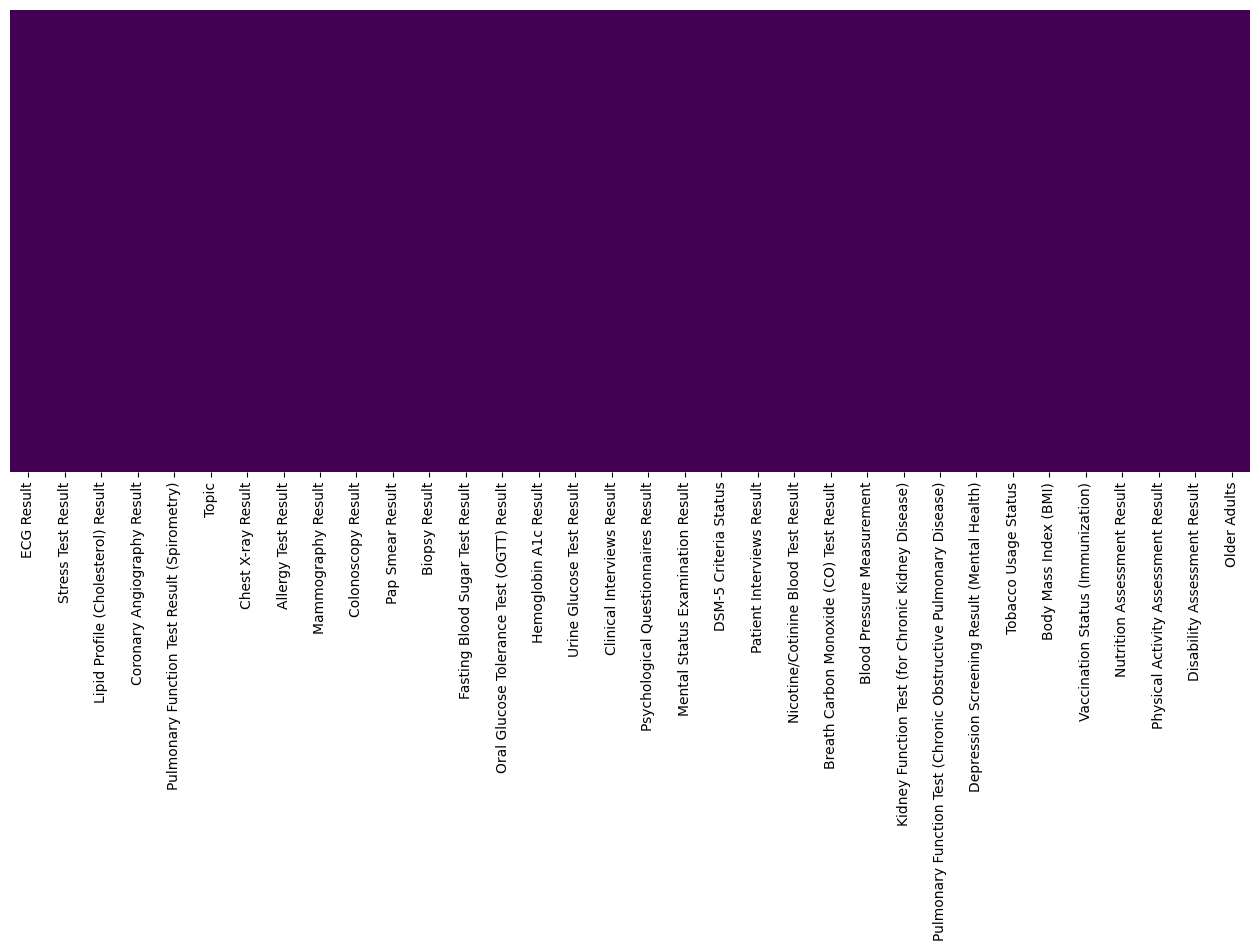

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Data pre-processing

In [17]:
#handling the problem
df.isnull().sum()

ECG Result                                                         0
Stress Test Result                                                 0
Lipid Profile (Cholesterol) Result                                 0
Coronary Angiography Result                                        0
Pulmonary Function Test Result (Spirometry)                        0
Topic                                                              0
Chest X-ray Result                                                 0
Allergy Test Result                                                0
Mammography Result                                                 0
Colonoscopy Result                                                 0
Pap Smear Result                                                   0
Biopsy Result                                                      0
Fasting Blood Sugar Test Result                                    0
Oral Glucose Tolerance Test (OGTT) Result                          0
Hemoglobin A1c Result             

###Methods for Data Cleaning


In [18]:
df.fillna(method='ffill')

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Topic,Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,8,8,2,3,23,2,80,0,2,13,...,41,2,29,13,0,7,0,0,0,0
1,12,12,5,5,23,2,80,0,2,13,...,53,2,29,13,1,11,0,0,0,0
2,12,12,7,8,23,2,80,0,2,13,...,2,2,29,13,1,11,0,0,0,0
3,11,11,10,10,23,2,80,0,2,13,...,4,2,29,13,0,6,0,0,0,0
4,4,4,23,23,23,2,80,0,2,13,...,17,2,29,13,2,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,14,14,54,54,6,7,49,0,1,2,...,47,7,110,1,2,12,0,0,0,0
1185672,14,14,54,54,6,12,176,0,1,8,...,47,12,156,8,2,12,0,0,0,0
1185673,11,11,13,16,6,1,0,0,1,2,...,9,1,20,1,2,8,0,0,0,0
1185674,14,14,54,54,6,7,48,0,1,8,...,47,7,104,8,2,8,0,0,0,0


In [19]:
df.interpolate()

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Topic,Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,8,8,2,3,23,2,80,0,2,13,...,41,2,29,13,0,7,0,0,0,0
1,12,12,5,5,23,2,80,0,2,13,...,53,2,29,13,1,11,0,0,0,0
2,12,12,7,8,23,2,80,0,2,13,...,2,2,29,13,1,11,0,0,0,0
3,11,11,10,10,23,2,80,0,2,13,...,4,2,29,13,0,6,0,0,0,0
4,4,4,23,23,23,2,80,0,2,13,...,17,2,29,13,2,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,14,14,54,54,6,7,49,0,1,2,...,47,7,110,1,2,12,0,0,0,0
1185672,14,14,54,54,6,12,176,0,1,8,...,47,12,156,8,2,12,0,0,0,0
1185673,11,11,13,16,6,1,0,0,1,2,...,9,1,20,1,2,8,0,0,0,0
1185674,14,14,54,54,6,7,48,0,1,8,...,47,7,104,8,2,8,0,0,0,0


In [20]:
df.select_dtypes(object)

""
0
1
2
3
4
...
1185671
1185672
1185673
1185674


###Method

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

         ECG Result  Stress Test Result  Lipid Profile (Cholesterol) Result  \
0                14                  14                                  12   
1                 4                   4                                  45   
2                 4                   4                                  52   
3                 3                   3                                   2   
4                10                  10                                  16   
...             ...                 ...                                 ...   
1185671           6                   6                                  50   
1185672           6                   6                                  50   
1185673           3                   3                                   5   
1185674           6                   6                                  50   
1185675           5                   5                                  36   

         Coronary Angiography Result  \
0          

##Cleaned Dataset

<Axes: >

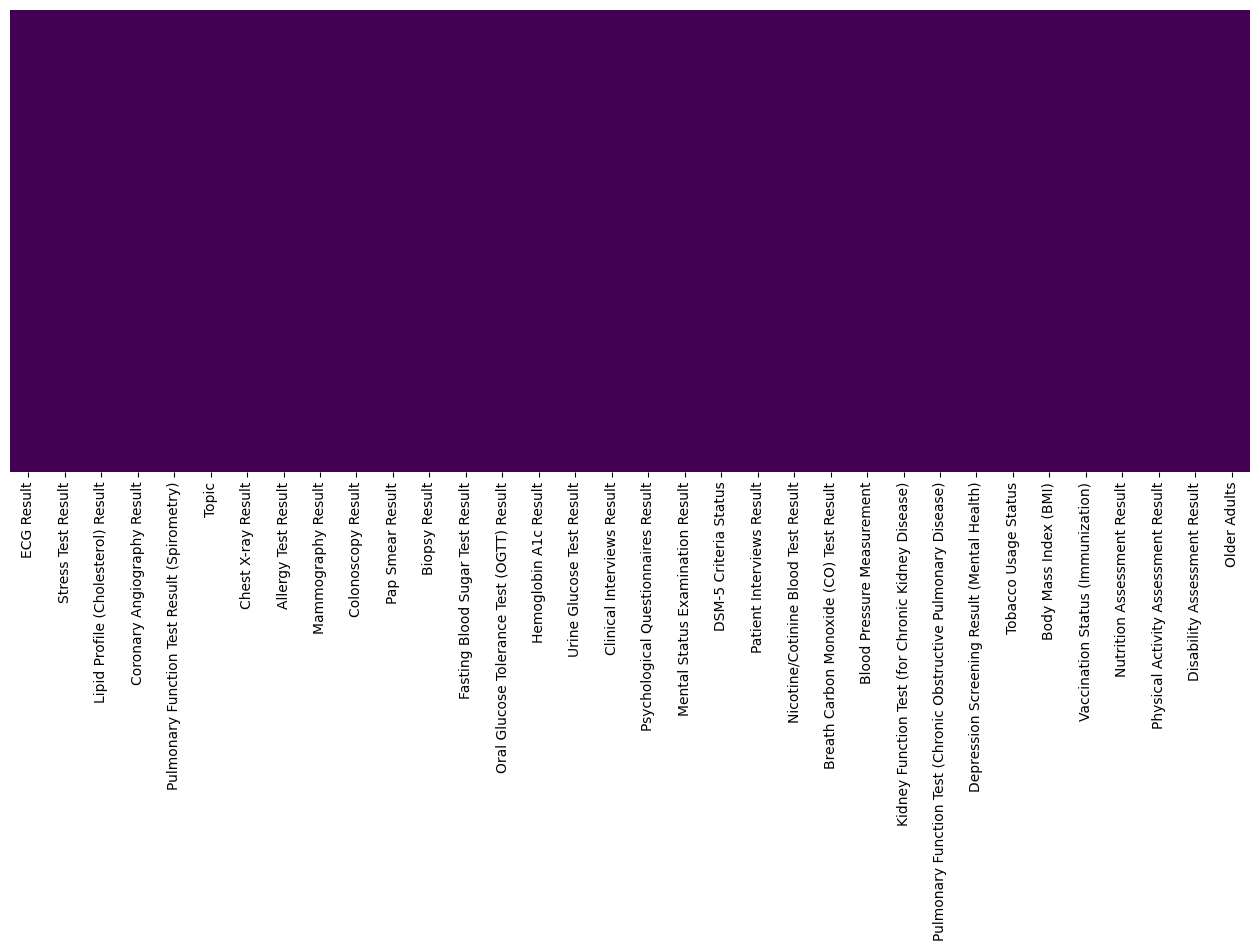

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##Model Building

In [24]:
y=df['Topic']
y

0           9
1           9
2           9
3           9
4           9
           ..
1185671    14
1185672     4
1185673     1
1185674    14
1185675     1
Name: Topic, Length: 1185676, dtype: int64

In [25]:
x = df.drop('Topic',axis=1)
x

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,14,14,12,23,16,182,0,5,5,35613,...,36,9,125,5,0,10,0,0,0,0
1,4,4,45,45,16,182,0,5,5,4945,...,49,9,125,5,1,3,0,0,0,0
2,4,4,52,53,16,182,0,5,5,29748,...,12,9,125,5,1,3,0,0,0,0
3,3,3,2,2,16,182,0,5,5,14204,...,34,9,125,5,0,9,0,0,0,0
4,10,10,16,16,16,182,0,5,5,37584,...,9,9,125,5,2,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,6,6,50,50,27,147,0,1,11,37462,...,42,14,14,1,2,4,0,0,0,0
1185672,6,6,50,50,27,86,0,1,17,17425,...,42,4,64,17,2,4,0,0,0,0
1185673,3,3,5,8,27,0,0,1,11,37462,...,54,1,113,1,2,11,0,0,0,0
1185674,6,6,50,50,27,146,0,1,17,37462,...,42,14,7,17,2,11,0,0,0,0


### Splitting the training and testing data

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)


In [27]:
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
675175,7,7,4,4,27,160,0,1,11,37462,...,45,14,11,1,0,10,0,0,0,0
760410,15,15,11,11,27,140,0,1,17,27314,...,5,6,78,17,2,11,0,0,0,0
808799,3,3,15,13,27,70,0,1,11,2875,...,6,11,157,1,2,4,0,0,0,0
966196,13,13,30,30,27,53,0,1,11,33616,...,24,14,3,1,0,9,0,0,0,0
920061,5,5,26,25,27,116,0,1,11,37462,...,18,1,118,1,0,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212912,9,13,49,48,6,17,0,5,15,37462,...,40,10,153,15,2,11,0,0,0,0
65615,11,15,50,50,18,199,0,3,14,14459,...,42,10,132,14,2,4,0,0,0,0
864087,4,4,21,28,27,147,0,1,17,37462,...,21,14,14,17,2,8,0,0,0,0
210755,15,5,33,33,6,17,0,3,14,2802,...,28,10,153,14,0,9,0,0,0,0


In [28]:
x_test

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
408260,5,5,34,34,11,18,0,11,18,39652,...,44,14,4,18,2,0,0,0,0,0
49902,3,3,49,48,11,57,0,9,18,37462,...,40,9,127,18,0,10,0,0,0,0
597157,7,7,51,51,27,162,0,1,17,37462,...,50,14,12,17,2,4,0,0,0,0
1073901,5,5,40,40,27,13,0,1,11,42670,...,33,1,68,1,2,11,0,0,0,0
698354,5,5,6,5,27,47,0,1,17,37462,...,51,9,130,17,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152582,15,5,14,14,6,124,0,3,14,2827,...,7,10,146,14,0,9,0,0,0,0
483781,3,3,20,20,4,178,0,8,12,32465,...,14,4,63,11,2,0,0,0,0,0
247885,15,15,8,7,11,26,0,11,18,2630,...,53,12,160,18,2,8,0,0,0,0
559051,3,3,23,12,27,13,0,1,11,10026,...,25,1,68,1,2,12,0,0,0,0


In [29]:
y_train

675175     14
760410      6
808799     12
966196     14
920061      1
           ..
212912     10
65615      10
864087     14
210755     10
1104664    13
Name: Topic, Length: 948540, dtype: int64

In [30]:
y_test

408260     14
49902       9
597157     14
1073901     1
698354      9
           ..
152582     10
483781      4
247885     13
559051      1
417267     14
Name: Topic, Length: 237136, dtype: int64

In [31]:
print(df['Topic'].unique())


[ 9 10 12 13 11 14 15  7  8  0  1  3  2  4  5  6 16]


##XGBOOST ALGORITHM

In [32]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[['ECG Result', 'Stress Test Result',
       'Lipid Profile (Cholesterol) Result', 'Coronary Angiography Result',
       'Pulmonary Function Test Result (Spirometry)',
       'Chest X-ray Result', 'Allergy Test Result', 'Mammography Result',
       'Colonoscopy Result', 'Pap Smear Result', 'Biopsy Result',
       'Fasting Blood Sugar Test Result',
       'Oral Glucose Tolerance Test (OGTT) Result', 'Hemoglobin A1c Result',
       'Urine Glucose Test Result', 'Clinical Interviews Result',
       'Psychological Questionnaires Result',
       'Mental Status Examination Result', 'DSM-5 Criteria Status',
       'Patient Interviews Result', 'Nicotine/Cotinine Blood Test Result',
       'Breath Carbon Monoxide (CO) Test Result', 'Blood Pressure Measurement',
       'Kidney Function Test (for Chronic Kidney Disease)',
       'Pulmonary Function Test (Chronic Obstructive Pulmonary Disease)',
       'Depression Screening Result (Mental Health)', 'Tobacco Usage Status',
       'Body Mass Index (BMI)', 'Vaccination Status (Immunization)',
       'Nutrition Assessment Result', 'Physical Activity Assessment Result',
       'Disability Assessment Result', 'Older Adults']]
y = df['Topic']
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the label encoder to your class labels (training and test combined)
all_labels = pd.concat([y_train, y_test], axis=0)
label_encoder.fit(all_labels)

# Transform both the training and test labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the XGBoost classifier with the encoded class labels
model = xgb.XGBClassifier()
model.fit(x_train, y_train_encoded)

# Make predictions on the training set
y_xgb_train_pred = model.predict(x_train)

# Make predictions on the test set
y_xgb_test_pred = model.predict(x_test)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train_encoded, y_xgb_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_xgb_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create and train the XGBoost classifier
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Make predictions on the training set
y_xgb_train_pred = model.predict(x_train)

# Make predictions on the test set
y_xgb_test_pred = model.predict(x_test)

# Print the predictions
print("Predictions on the training set:", y_xgb_train_pred)
print("Predictions on the test set:", y_xgb_test_pred)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_xgb_train_pred)
test_accuracy = accuracy_score(y_test, y_xgb_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Calculate confusion matrix for the test set
confusion = confusion_matrix(y_test, y_xgb_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Calculate other scores as previously shown
train_f1 = f1_score(y_train, y_xgb_train_pred, average='weighted')
train_recall = recall_score(y_train, y_xgb_train_pred, average='weighted')
train_precision = precision_score(y_train, y_xgb_train_pred, average='weighted')

test_f1 = f1_score(y_test, y_xgb_test_pred, average='weighted')
test_recall = recall_score(y_test, y_xgb_test_pred, average='weighted')
test_precision = precision_score(y_test, y_xgb_test_pred, average='weighted')

false_alarm_rate = confusion[1, 0] / (confusion[0, 0] + confusion[1, 0])

# Print the scores
print("Training F1 Score:", train_f1)
print("Training Recall Score:", train_recall)
print("Training Precision Score:", train_precision)

print("Test F1 Score:", test_f1)
print("Test Recall Score:", test_recall)
print("Test Precision Score:", test_precision)
print("False Alarm Rate:", false_alarm_rate)

Training Accuracy: 1.0
Test Accuracy: 1.0
Predictions on the training set: [14  6 12 ... 14 10 13]
Predictions on the test set: [14  9 14 ... 13  1 14]
Training Accuracy: 1.0
Test Accuracy: 1.0
Confusion Matrix:
[[13159     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0 15575     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0  2637     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0 15166     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0  5203     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0  4500     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     0 14473     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     0  

### Model

In [33]:
import joblib

# Save the trained model to a file
model_filename = 'xgboost_model.pkl'
joblib.dump(model, model_filename)

# Load the saved model from the file
loaded_model = joblib.load(model_filename)

# You can now use loaded_model for predictions
y_test_pred = loaded_model.predict(x_test)


In [34]:
x = df.drop('Topic',axis=1)
x

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,14,14,12,23,16,182,0,5,5,35613,...,36,9,125,5,0,10,0,0,0,0
1,4,4,45,45,16,182,0,5,5,4945,...,49,9,125,5,1,3,0,0,0,0
2,4,4,52,53,16,182,0,5,5,29748,...,12,9,125,5,1,3,0,0,0,0
3,3,3,2,2,16,182,0,5,5,14204,...,34,9,125,5,0,9,0,0,0,0
4,10,10,16,16,16,182,0,5,5,37584,...,9,9,125,5,2,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,6,6,50,50,27,147,0,1,11,37462,...,42,14,14,1,2,4,0,0,0,0
1185672,6,6,50,50,27,86,0,1,17,17425,...,42,4,64,17,2,4,0,0,0,0
1185673,3,3,5,8,27,0,0,1,11,37462,...,54,1,113,1,2,11,0,0,0,0
1185674,6,6,50,50,27,146,0,1,17,37462,...,42,14,7,17,2,11,0,0,0,0


In [35]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (1185676, 33)
Shape of y: (1185676,)


In [36]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
675175,7,7,4,4,27,160,0,1,11,37462,...,45,14,11,1,0,10,0,0,0,0
760410,15,15,11,11,27,140,0,1,17,27314,...,5,6,78,17,2,11,0,0,0,0
808799,3,3,15,13,27,70,0,1,11,2875,...,6,11,157,1,2,4,0,0,0,0
966196,13,13,30,30,27,53,0,1,11,33616,...,24,14,3,1,0,9,0,0,0,0
920061,5,5,26,25,27,116,0,1,11,37462,...,18,1,118,1,0,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212912,9,13,49,48,6,17,0,5,15,37462,...,40,10,153,15,2,11,0,0,0,0
65615,11,15,50,50,18,199,0,3,14,14459,...,42,10,132,14,2,4,0,0,0,0
864087,4,4,21,28,27,147,0,1,17,37462,...,21,14,14,17,2,8,0,0,0,0
210755,15,5,33,33,6,17,0,3,14,2802,...,28,10,153,14,0,9,0,0,0,0


In [38]:
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
675175,7,7,4,4,27,160,0,1,11,37462,...,45,14,11,1,0,10,0,0,0,0
760410,15,15,11,11,27,140,0,1,17,27314,...,5,6,78,17,2,11,0,0,0,0
808799,3,3,15,13,27,70,0,1,11,2875,...,6,11,157,1,2,4,0,0,0,0
966196,13,13,30,30,27,53,0,1,11,33616,...,24,14,3,1,0,9,0,0,0,0
920061,5,5,26,25,27,116,0,1,11,37462,...,18,1,118,1,0,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212912,9,13,49,48,6,17,0,5,15,37462,...,40,10,153,15,2,11,0,0,0,0
65615,11,15,50,50,18,199,0,3,14,14459,...,42,10,132,14,2,4,0,0,0,0
864087,4,4,21,28,27,147,0,1,17,37462,...,21,14,14,17,2,8,0,0,0,0
210755,15,5,33,33,6,17,0,3,14,2802,...,28,10,153,14,0,9,0,0,0,0


In [39]:
x_test

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
408260,5,5,34,34,11,18,0,11,18,39652,...,44,14,4,18,2,0,0,0,0,0
49902,3,3,49,48,11,57,0,9,18,37462,...,40,9,127,18,0,10,0,0,0,0
597157,7,7,51,51,27,162,0,1,17,37462,...,50,14,12,17,2,4,0,0,0,0
1073901,5,5,40,40,27,13,0,1,11,42670,...,33,1,68,1,2,11,0,0,0,0
698354,5,5,6,5,27,47,0,1,17,37462,...,51,9,130,17,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152582,15,5,14,14,6,124,0,3,14,2827,...,7,10,146,14,0,9,0,0,0,0
483781,3,3,20,20,4,178,0,8,12,32465,...,14,4,63,11,2,0,0,0,0,0
247885,15,15,8,7,11,26,0,11,18,2630,...,53,12,160,18,2,8,0,0,0,0
559051,3,3,23,12,27,13,0,1,11,10026,...,25,1,68,1,2,12,0,0,0,0


In [40]:
y_train

675175     14
760410      6
808799     12
966196     14
920061      1
           ..
212912     10
65615      10
864087     14
210755     10
1104664    13
Name: Topic, Length: 948540, dtype: int64

In [41]:
y_test

408260     14
49902       9
597157     14
1073901     1
698354      9
           ..
152582     10
483781      4
247885     13
559051      1
417267     14
Name: Topic, Length: 237136, dtype: int64

##DECISION TREE

###Accuracy of Decision Tree

In [42]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into a training set and a testing set (you can also use cross-validation)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier instance
dtc = DecisionTreeClassifier()

# Train the model on the training data
dtc.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Optionally, you can visualize the decision tree
# This requires the graphviz library to be installed
#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
#plot_tree(dtc, filled=True, feature_names=feature_names, class_names=class_names)
#plt.show()


Accuracy: 1.0


In [43]:
feature_names = df.columns.tolist()
# Assuming the target column is named 'target', extract class names
class_names = df['Topic'].unique().tolist()

print("Feature Names:", feature_names)
print("Class Names:", class_names)


Feature Names: ['ECG Result', 'Stress Test Result', 'Lipid Profile (Cholesterol) Result', 'Coronary Angiography Result', 'Pulmonary Function Test Result (Spirometry)', 'Topic', 'Chest X-ray Result', 'Allergy Test Result', 'Mammography Result', 'Colonoscopy Result', 'Pap Smear Result', 'Biopsy Result', 'Fasting Blood Sugar Test Result', 'Oral Glucose Tolerance Test (OGTT) Result', 'Hemoglobin A1c Result', 'Urine Glucose Test Result', 'Clinical Interviews Result', 'Psychological Questionnaires Result', 'Mental Status Examination Result', 'DSM-5 Criteria Status', 'Patient Interviews Result', 'Nicotine/Cotinine Blood Test Result', 'Breath Carbon Monoxide (CO) Test Result', 'Blood Pressure Measurement', 'Kidney Function Test (for Chronic Kidney Disease)', 'Pulmonary Function Test (Chronic Obstructive Pulmonary Disease)', 'Depression Screening Result (Mental Health)', 'Tobacco Usage Status', 'Body Mass Index (BMI)', 'Vaccination Status (Immunization)', 'Nutrition Assessment Result', 'Physica

### Plot of Decision Tree

In [44]:
unique_classes = df['Topic'].unique()  # Replace 'Topic' with your actual target variable name
print(unique_classes)

[ 9 10 12 13 11 14 15  7  8  0  1  3  2  4  5  6 16]


In [45]:
(np.unique(y_train))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [46]:
dtc.n_classes_

17

In [47]:
class_names

[9, 10, 12, 13, 11, 14, 15, 7, 8, 0, 1, 3, 2, 4, 5, 6, 16]

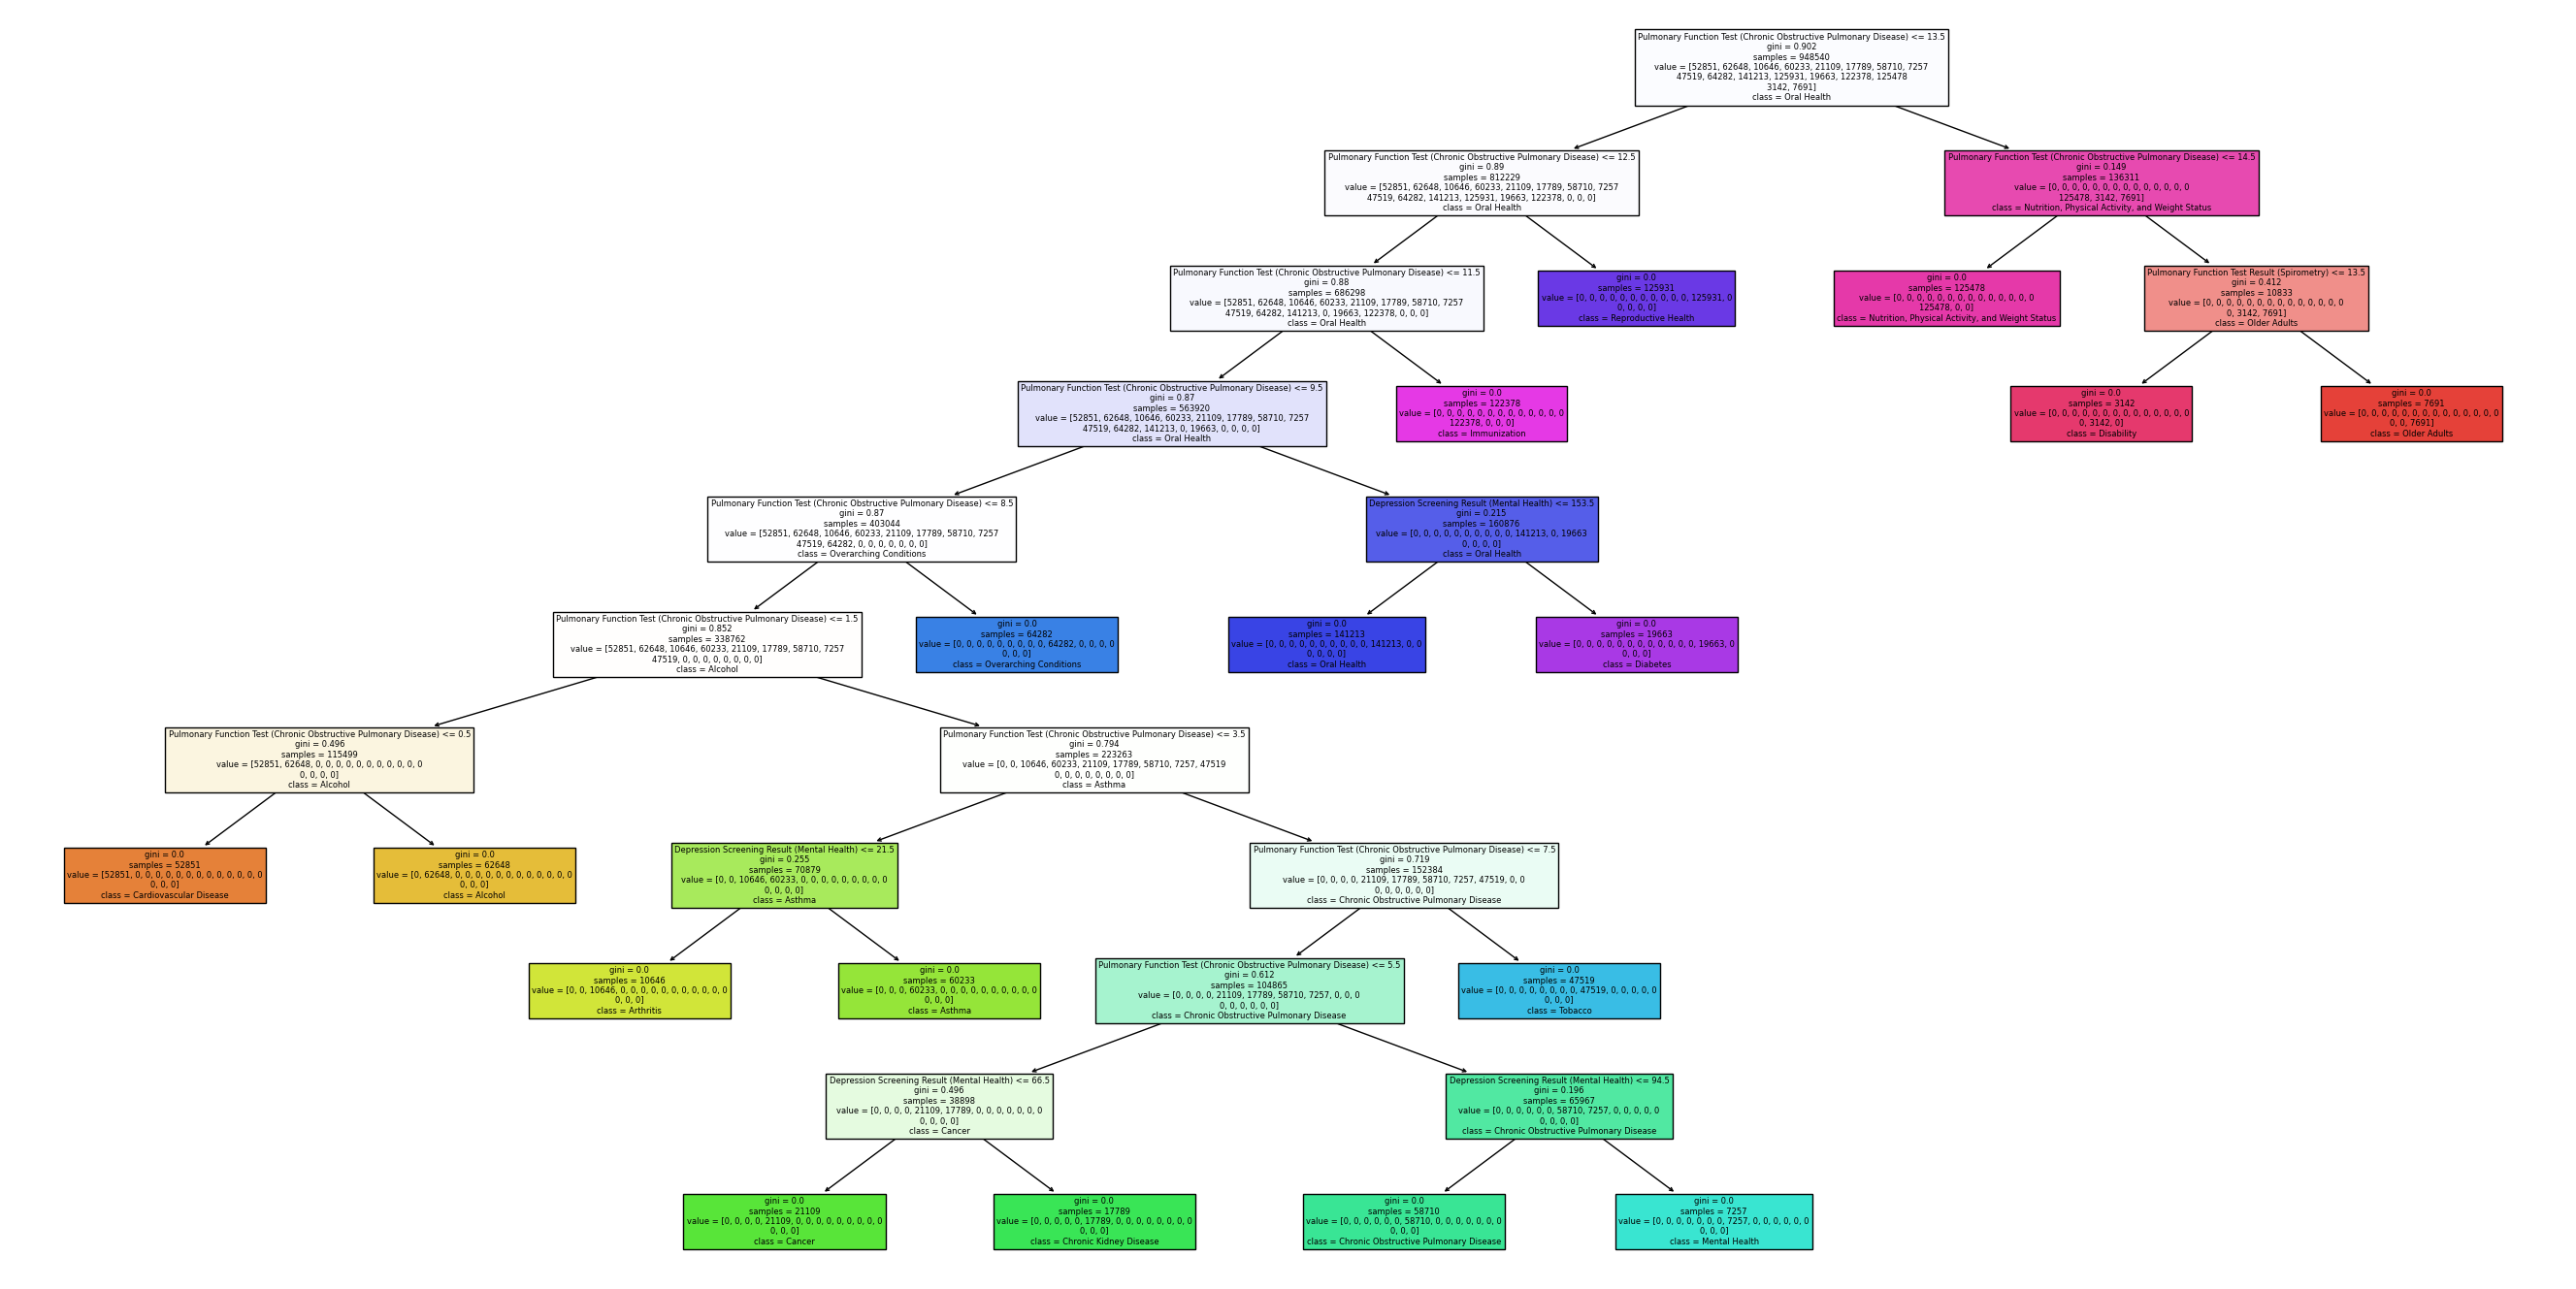

In [48]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Define class names with 17 classes
class_names = ['Cardiovascular Disease', 'Alcohol', 'Arthritis', 'Asthma', 'Cancer', 'Chronic Kidney Disease',
               'Chronic Obstructive Pulmonary Disease', 'Mental Health', 'Tobacco', 'Overarching Conditions',
               'Oral Health', 'Reproductive Health', 'Diabetes', 'Immunization', 'Nutrition, Physical Activity, and Weight Status',
               'Disability', 'Older Adults']

plt.figure(figsize=(34, 17))
plot_tree(dtc, filled=True, feature_names=['ECG Result', 'Stress Test Result',
       'Lipid Profile (Cholesterol) Result', 'Coronary Angiography Result',
       'Pulmonary Function Test Result (Spirometry)','Topic'
       'Chest X-ray Result', 'Allergy Test Result', 'Mammography Result',
       'Colonoscopy Result', 'Pap Smear Result', 'Biopsy Result',
       'Fasting Blood Sugar Test Result',
       'Oral Glucose Tolerance Test (OGTT) Result', 'Hemoglobin A1c Result',
       'Urine Glucose Test Result', 'Clinical Interviews Result',
       'Psychological Questionnaires Result',
       'Mental Status Examination Result', 'DSM-5 Criteria Status',
       'Patient Interviews Result', 'Nicotine/Cotinine Blood Test Result',
       'Breath Carbon Monoxide (CO) Test Result', 'Blood Pressure Measurement',
       'Kidney Function Test (for Chronic Kidney Disease)',
       'Pulmonary Function Test (Chronic Obstructive Pulmonary Disease)',
       'Depression Screening Result (Mental Health)', 'Tobacco Usage Status',
       'Body Mass Index (BMI)', 'Vaccination Status (Immunization)',
       'Nutrition Assessment Result', 'Physical Activity Assessment Result',
       'Disability Assessment Result', 'Older Adults'],
class_names=class_names)

plt.show()


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the dataset into a training set and a testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier instance
dtc = DecisionTreeClassifier()

# Train the model on the training data
dtc.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(x_test)

# Calculate additional classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(confusion)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[13240     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0 15652     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0  2554     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0 15185     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0  5207     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0  4484     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     0 14550     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     0     0  1829     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     0     0     0 11877     0     0    

### Model

In [50]:
import joblib

# Save the trained Decision Tree model to a file
model_filename = 'decision_tree_model.pkl'
joblib.dump(dtc, model_filename)

# Load the saved model from the file
loaded_model = joblib.load(model_filename)

# You can now use loaded_model for predictions
y_test_pred = loaded_model.predict(x_test)


In [51]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'class_column' is the name of the column containing class labels
num_classes = df['Topic'].nunique()
print("Number of classes:", num_classes)


Number of classes: 17


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

         ECG Result  Stress Test Result  Lipid Profile (Cholesterol) Result  \
0                 6                   6                                   4   
1                10                  10                                  40   
2                10                  10                                  48   
3                 9                   9                                  12   
4                 2                   2                                   8   
...             ...                 ...                                 ...   
1185671          12                  12                                  46   
1185672          12                  12                                  46   
1185673           9                   9                                  45   
1185674          12                  12                                  46   
1185675          11                  11                                  30   

         Coronary Angiography Result  \
0          

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

NameError: name 'sns' is not defined

<Figure size 1600x600 with 0 Axes>

In [ ]:
y=df['Topic']
y

In [ ]:
x = df.drop('Topic',axis=1)
x

In [ ]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

##ANN ALGORITHM

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have your numeric feature data 'x' and labels 'y'
# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the number of classes
num_classes = 17  # Change this to the actual number of classes

# Create a function that builds the ANN model
def build_model(dropout_rate=0.5):
    model = keras.Sequential([
        layers.Input(shape=(x_train_scaled.shape[1],)),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'dropout_rate': [0.3],
    'batch_size': [128],
    'num_epochs': [100]
}

# Initialize K-Fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize variables to store the best hyperparameters and accuracy
best_hyperparameters = None
best_accuracy = 0.0

# Perform hyperparameter tuning
for dropout_rate in param_grid['dropout_rate']:
    for batch_size in param_grid['batch_size']:
        for num_epochs in param_grid['num_epochs']:
            print(f"Training model with dropout={dropout_rate}, batch_size={batch_size}, num_epochs={num_epochs}")

            # Build the model
            model = build_model(dropout_rate=dropout_rate)

            # Train the model
            model.fit(x_train_scaled, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)

            # Evaluate accuracy on the validation set
            y_val_pred = model.predict(x_test_scaled)
            y_val_pred_classes = np.argmax(y_val_pred, axis=1)
            accuracy_val = accuracy_score(y_test, y_val_pred_classes)

            print(f"Validation accuracy: {accuracy_val:.4f}\n")

            # Check if this model has the best accuracy so far
            if accuracy_val > best_accuracy:
                best_accuracy = accuracy_val
                best_hyperparameters = {
                    'dropout_rate': dropout_rate,
                    'batch_size': batch_size,
                    'num_epochs': num_epochs
                }

print("Best Hyperparameters:", best_hyperparameters)
print("Best Validation Accuracy:", best_accuracy)
# Build and train the best model with the optimal hyperparameters
best_model = build_model(dropout_rate=best_hyperparameters['dropout_rate'])
best_model.fit(x_train_scaled, y_train, epochs=best_hyperparameters['num_epochs'], batch_size=best_hyperparameters['batch_size'], verbose=2)

# Save the best model using joblib
joblib.dump(best_model, "best_ann_model.pkl")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Predict using the best model
y_pred = best_model.predict(x_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate additional classification metrics
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
confusion = confusion_matrix(y_test, y_pred_classes)

# Print the evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(confusion)


##KNN AKGORITHM

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

In [ ]:
y=df['Topic']
y

In [ ]:
x = df.drop('Topic',axis=1)
x

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
x_train

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split your data into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Hyperparameter tuning
k_neighbors = 5  # You can adjust this hyperparameter
knn_model = KNeighborsClassifier(n_neighbors=k_neighbors)

# Cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

train_accs = []
val_accs = []

for train_index, val_index in kf.split(x_train_scaled):
    x_train_fold, x_val_fold = x_train_scaled[train_index], x_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the KNN model to the training fold
    knn_model.fit(x_train_fold, y_train_fold)

    # Evaluate accuracy on the training fold
    train_pred = knn_model.predict(x_train_fold)
    train_acc = accuracy_score(y_train_fold, train_pred)
    train_accs.append(train_acc)

    # Evaluate accuracy on the validation fold
    val_pred = knn_model.predict(x_val_fold)
    val_acc = accuracy_score(y_val_fold, val_pred)
    val_accs.append(val_acc)

mean_train_acc = np.mean(train_accs)
std_train_acc = np.std(train_accs)
mean_val_acc = np.mean(val_accs)
std_val_acc = np.std(val_accs)

print(f"Mean Training Accuracy: {mean_train_acc:.4f} ± {std_train_acc:.4f}")
print(f"Mean Validation Accuracy: {mean_val_acc:.4f} ± {std_val_acc:.4f}")

# Fit the final KNN model on the entire training data
knn_model.fit(x_train_scaled, y_train)

# Make predictions on the validation and test sets
val_pred = knn_model.predict(x_val_scaled)
test_pred = knn_model.predict(x_test_scaled)

# Calculate accuracy on the validation and test sets
val_accuracy = accuracy_score(y_val, val_pred)
test_accuracy = accuracy_score(y_test, test_pred)

from sklearn.metrics import classification_report
# Calculate the classification report with zero division handling
class_report = classification_report(y_test, test_pred, zero_division=0)

# Print classification report for more detailed evaluation
print("Validation Set Accuracy:", val_accuracy)
print("Test Set Accuracy:", test_accuracy)
print("Classification Report for Test Set:")
print(classification_report(y_test, test_pred, zero_division=0))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')

# Print precision, recall, and F1 score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate and print the classification report
class_report = classification_report(y_test, test_pred)
print("Classification Report for Test Set:")
print(class_report)


In [ ]:

import joblib
# Specify the filename for the saved model
model_filename = 'knn_model.pkl'
# Save the KNN model using Joblib
joblib.dump(knn_model, model_filename)
print(f"KNN model has been saved as '{model_filename}'.")

##SVM ALGORITHM

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

In [ ]:
y=df['Topic']
y

In [ ]:
x = df.drop('Topic',axis=1)
x

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)
x_train

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

# Assuming you have your numeric feature data 'x' and labels 'y'
# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define a simplified parameter grid for hyperparameter tuning
param_dist = {
    'C': [1],  # Choose a reasonable value for C
    'kernel': ['linear'],  # Use a linear kernel for speed
}

# Create an SVM model
svm_model = SVC()

# Perform hyperparameter tuning using RandomizedSearchCV with reduced iterations
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, cv=5, n_iter=5, n_jobs=-1)
random_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_

# Train the SVM model with the best hyperparameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svm_model.predict(x_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print accuracy, precision, recall, and F1 score
print("SVM Accuracy:", accuracy)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
import joblib
# Save the best SVM model to a .pkl file
model_filename = "best_svm_model.pkl"
joblib.dump(best_svm_model, model_filename)
print("SVM model saved to", model_filename)


##RANDOM FOREST ALGORITHM

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

In [ ]:
y=df['Topic']
y

In [ ]:
x = df.drop('Topic',axis=1)
x

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)
x_train

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Assuming you have your numeric feature data 'x' and labels 'y'
# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=100)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=100)
best_rf_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(x_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print accuracy, precision, recall, and F1 score
print("Random Forest Accuracy:", accuracy)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
import joblib
# Save the best Random Forest model to a .pkl file
model_filename = "best_rf_model.pkl"
joblib.dump(best_rf_model, model_filename)
print("Random Forest model saved to", model_filename)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your training data x_train and corresponding labels y_train
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Get feature importances from the fitted Random Forest model
feature_importances = rf_model.feature_importances_
# Get the names of the features
feature_names = ['ECG Result', 'Stress Test Result',
       'Lipid Profile (Cholesterol) Result', 'Coronary Angiography Result',
       'Pulmonary Function Test Result (Spirometry)','Topic'
       'Chest X-ray Result', 'Allergy Test Result', 'Mammography Result',
       'Colonoscopy Result', 'Pap Smear Result', 'Biopsy Result',
       'Fasting Blood Sugar Test Result',
       'Oral Glucose Tolerance Test (OGTT) Result', 'Hemoglobin A1c Result',
       'Urine Glucose Test Result', 'Clinical Interviews Result',
       'Psychological Questionnaires Result',
       'Mental Status Examination Result', 'DSM-5 Criteria Status',
       'Patient Interviews Result', 'Nicotine/Cotinine Blood Test Result',
       'Breath Carbon Monoxide (CO) Test Result', 'Blood Pressure Measurement',
       'Kidney Function Test (for Chronic Kidney Disease)',
       'Pulmonary Function Test (Chronic Obstructive Pulmonary Disease)',
       'Depression Screening Result (Mental Health)', 'Tobacco Usage Status',
       'Body Mass Index (BMI)', 'Vaccination Status (Immunization)',
       'Nutrition Assessment Result', 'Physical Activity Assessment Result',
       'Disability Assessment Result', 'Older Adults']  # Replace with the actual feature names

# Sort the features by their importances
sorted_indices = feature_importances.argsort()

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()


In [ ]:
# Define a dictionary to store the models and their names
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # Enable probability estimation for ROC curve
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Train and evaluate each model
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
roc_results = {}
for name, model in models.items():
    # Train the model
    model.fit(x_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test_scaled)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Update results dictionary
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

    # Plot ROC curve and calculate AUC for binary classifiers
    if hasattr(model, "predict_proba") and len(np.unique(y_train)) == 2:
        prob_pos = model.predict_proba(x_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, prob_pos)
        roc_auc = auc(fpr, tpr)

        roc_results[name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Print the results
for metric, values in results.items():
    if metric != 'Model':
        print(f"{metric}:")
        for model, value in zip(results['Model'], values):
            print(f"{model}: {value:.4f}")
        print()

# Plotting the results
plt.figure(figsize=(10, 6))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics_to_plot:
    plt.bar(results['Model'], results[metric], label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.show()

# Plotting ROC curves and calculating AUC for binary classifiers
for name, roc_data in roc_results.items():
    fpr = roc_data['fpr']
    tpr = roc_data['tpr']
    roc_auc = roc_data['roc_auc']

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have your feature data 'x' and labels 'y'

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define a dictionary to store the models and their names
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate each model
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
for name, model in models.items():
    # Train the model
    model.fit(x_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test_scaled)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Update results dictionary
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# Print the results
for metric, values in results.items():
    if metric != 'Model':
        print(f"{metric}:")
        for model, value in zip(results['Model'], values):
            print(f"{model}: {value:.4f}")
        print()

# Plotting the results
plt.figure(figsize=(10, 6))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics_to_plot:
    plt.bar(results['Model'], results[metric], label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.show()

# Calculating and displaying confusion matrices
for name, model in models.items():
    # Train the model (for consistency with evaluation)
    model.fit(x_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test_scaled)

    # Calculate confusion matrix
    confusion = confusion_matrix(y_test, y_pred)

    # Display confusion matrix
    print(f"Confusion Matrix for {name}:")
    print(confusion)
    print()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb

# Assuming you have your feature data 'X' and labels 'y' already defined

# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the label encoder to your class labels (training and test combined)
all_labels = pd.concat([y_train, y_test], axis=0)
label_encoder.fit(all_labels)

# Transform both the training and test labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Train and evaluate each model
results = {'Model': [], 'Training Accuracy': [], 'Test Accuracy': []}
for name, model in models.items():
    if name != 'XGBoost':  # For XGBoost, use the encoded labels
        model.fit(x_train_scaled, y_train)
        y_train_pred = model.predict(x_train_scaled)
        y_test_pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train_encoded)
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results['Model'].append(name)
    results['Training Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['Training Accuracy'], label='Training Accuracy')
plt.bar(results['Model'], results['Test Accuracy'], label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Overfitting')
plt.legend()
plt.show()
